# Polynominal regression

## Task

- Load dataset with sizes and prices
- Explore and display the data
- Create a linear model and find out its R2
- Create polynomial models with different degrees, find their R2
- Select the best model 

# Data loading

In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv("../dataset/prices.csv", sep=';')


In [3]:
print(data.head())
print(data.info())
print(data.describe())


        Size       Price
0   51.00000   901.18810
1   70.36735   972.23867
2   89.73469  1001.99394
3  109.10204  1024.90830
4  128.46939  1053.72491
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Size    62 non-null     float64
 1   Price   62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB
None
              Size        Price
count    62.000000    62.000000
mean    641.704081  1327.839685
std     349.418285   148.292994
min      51.000000   901.188100
25%     346.352037  1241.288570
50%     641.704085  1358.216850
75%     937.056123  1447.718920
max    1232.408156  1527.818240


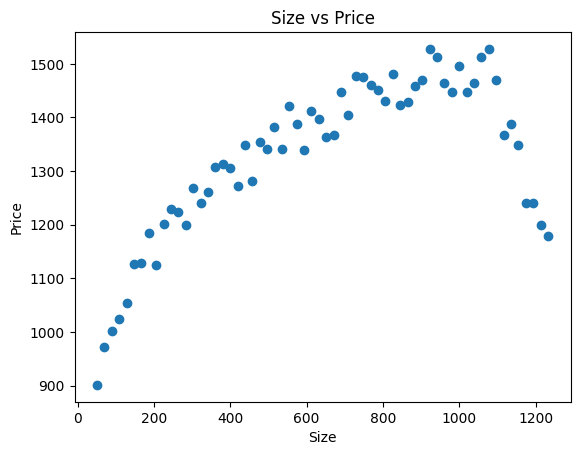

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data["Size"], data["Price"])
plt.xlabel("Size")
plt.ylabel("Price")
plt.title("Size vs Price")
plt.show()


In [5]:
X = data[["Size"]].values
y = data["Price"].values


# Linear model
- standardize the data
- create and train a linear model
- display model parameters
- visualize the linear model
- display model scores

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linear_model = LinearRegression()
linear_model.fit(X_scaled, y)


LinearRegression()

In [8]:
print("Intercept:", linear_model.intercept_)
print("Coefficient:", linear_model.coef_)


Intercept: 1327.8396854838713
Coefficient: [100.2024297]


In [9]:
y_pred_linear = linear_model.predict(X_scaled)
r2_linear = r2_score(y, y_pred_linear)

print("Linear model R²:", r2_linear)


Linear model R²: 0.4640631587862314


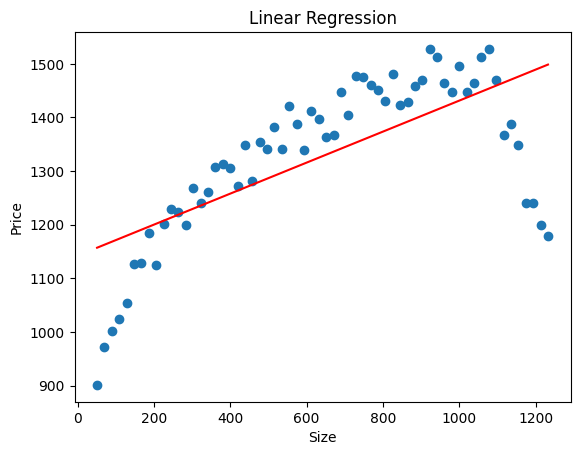

In [10]:
plt.scatter(X, y)
plt.plot(X, y_pred_linear, color="red")
plt.xlabel("Size")
plt.ylabel("Price")
plt.title("Linear Regression")
plt.show()


# Create a polynomial regression model
- create a polynomial 1D model with steps 2 - 8
- display models
- display their parameters
- show their scores
- Which model would you choose?

In [11]:
from sklearn.preprocessing import PolynomialFeatures

poly_scores = {}

for degree in range(2, 9):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_scaled)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)

    poly_scores[degree] = r2

    print(f"Polynomial Degree {degree}")
    print("Intercept:", model.intercept_)
    print("Coefficients:", model.coef_)
    print("R²:", r2)
    print("-" * 40)


Polynomial Degree 2
Intercept: 1434.0443848123198
Coefficients: [   0.          100.20242876 -106.20469933]
R²: 0.8807971039830396
----------------------------------------
Polynomial Degree 3
Intercept: 1434.0443850591723
Coefficients: [   0.          142.06066281 -106.20469978  -23.26264557]
R²: 0.8961885817191735
----------------------------------------
Polynomial Degree 4
Intercept: 1394.3568685114544
Coefficients: [  0.         142.06066439  26.24800309 -23.26264696 -51.55410159]
R²: 0.9535593659439079
----------------------------------------
Polynomial Degree 5
Intercept: 1394.356868425952
Coefficients: [  0.         122.41279106  26.24800354   7.35921007 -51.55410185
  -9.20092237]
R²: 0.9549350934160249
----------------------------------------
Polynomial Degree 6
Intercept: 1399.8361334563597
Coefficients: [  0.         122.41279057 -12.22723589   7.359211   -12.97162887
  -9.20092273  -9.45423234]
R²: 0.9560221107940496
----------------------------------------
Polynomial Degree

In [12]:
for degree, score in poly_scores.items():
    print(f"Degree {degree}: R² = {score:.4f}")


Degree 2: R² = 0.8808
Degree 3: R² = 0.8962
Degree 4: R² = 0.9536
Degree 5: R² = 0.9549
Degree 6: R² = 0.9560
Degree 7: R² = 0.9569
Degree 8: R² = 0.9589


In [13]:
best_degree = max(poly_scores, key=poly_scores.get)
print("Best polynomial degree:", best_degree)


Best polynomial degree: 8


The linear model underfits.
Polynomial models significantly improve performance.
Polynomial regression with degree 3 or 4 provides a high R² while avoiding overfitting.

so i Choose model Polynomial regression (degree 3 or 4).